In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams

# Set up LaTeX rendering and style

rcParams["figure.dpi"] = 600
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
rcParams["font.size"] = 15

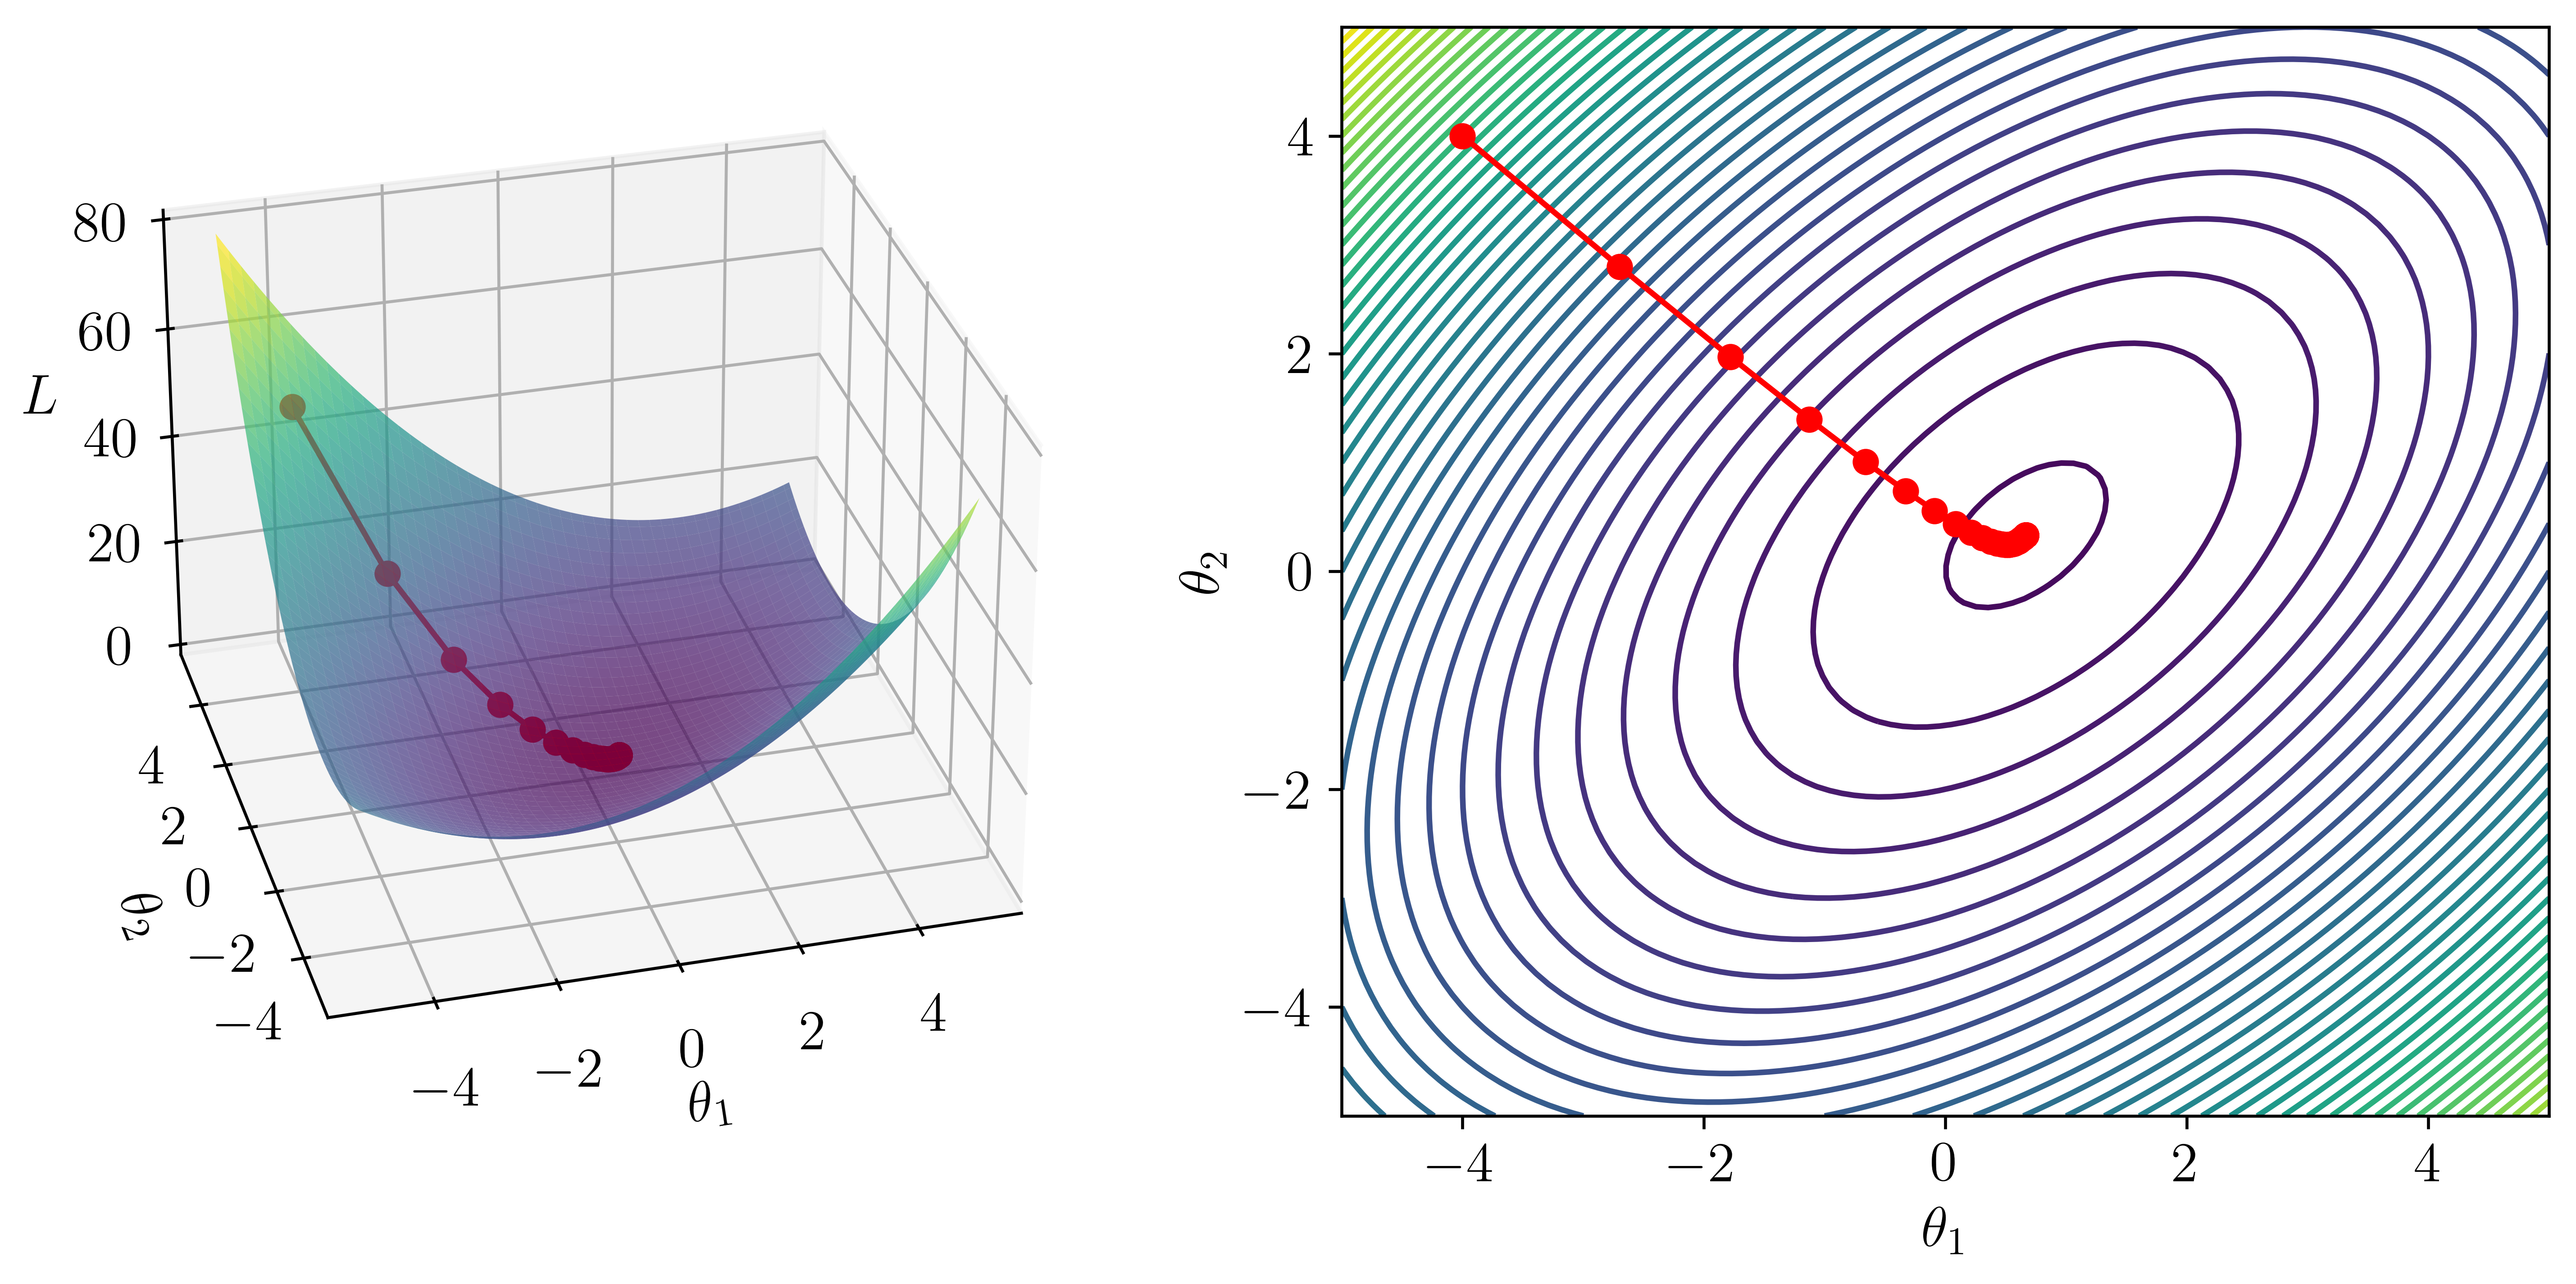

In [ ]:
# illustration of gradient descent


def L(x, y):
    return x**2 + y**2 - x * y - x


def grad_L(x, y):
    return np.array([2 * x - y - 1, 2 * y - x])


def gradient_descent(starting_point, learning_rate, num_iterations):
    points = [starting_point]
    for _ in range(num_iterations):
        grad = grad_L(*points[-1])
        new_point = points[-1] - learning_rate * grad
        points.append(new_point)
    return np.array(points)


points = gradient_descent(
    starting_point=np.array([-4, 4]), learning_rate=0.1, num_iterations=100
)


# 3D plot of the function
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = L(X, Y)
fig = plt.figure(figsize=(10, 5), tight_layout=True)

ax1 = fig.add_subplot(121, projection="3d")
ax2 = fig.add_subplot(122)

surf = ax1.plot_surface(
    X,
    Y,
    Z,
    cmap="viridis",
    edgecolor="none",
    alpha=0.7,
)
ax1.view_init(30, -105)

# plot gradient descent path
ax1.plot(
    points[:, 0],
    points[:, 1],
    L(points[:, 0], points[:, 1]),
    color="red",
    marker="o",
)

# set labels
ax1.set_xlabel(r"$\theta_1$")
ax1.set_ylabel(r"$\theta_2$")
ax1.set_zlabel(r"$L$")

# 2d contour plot
ax2.contour(X, Y, Z, levels=50, cmap="viridis")
ax2.plot(
    points[:, 0],
    points[:, 1],
    color="red",
    marker="o",
)
ax2.set_xlabel(r"$\theta_1$")
ax2.set_ylabel(r"$\theta_2$")

plt.savefig("figs/gradient_descent.png")

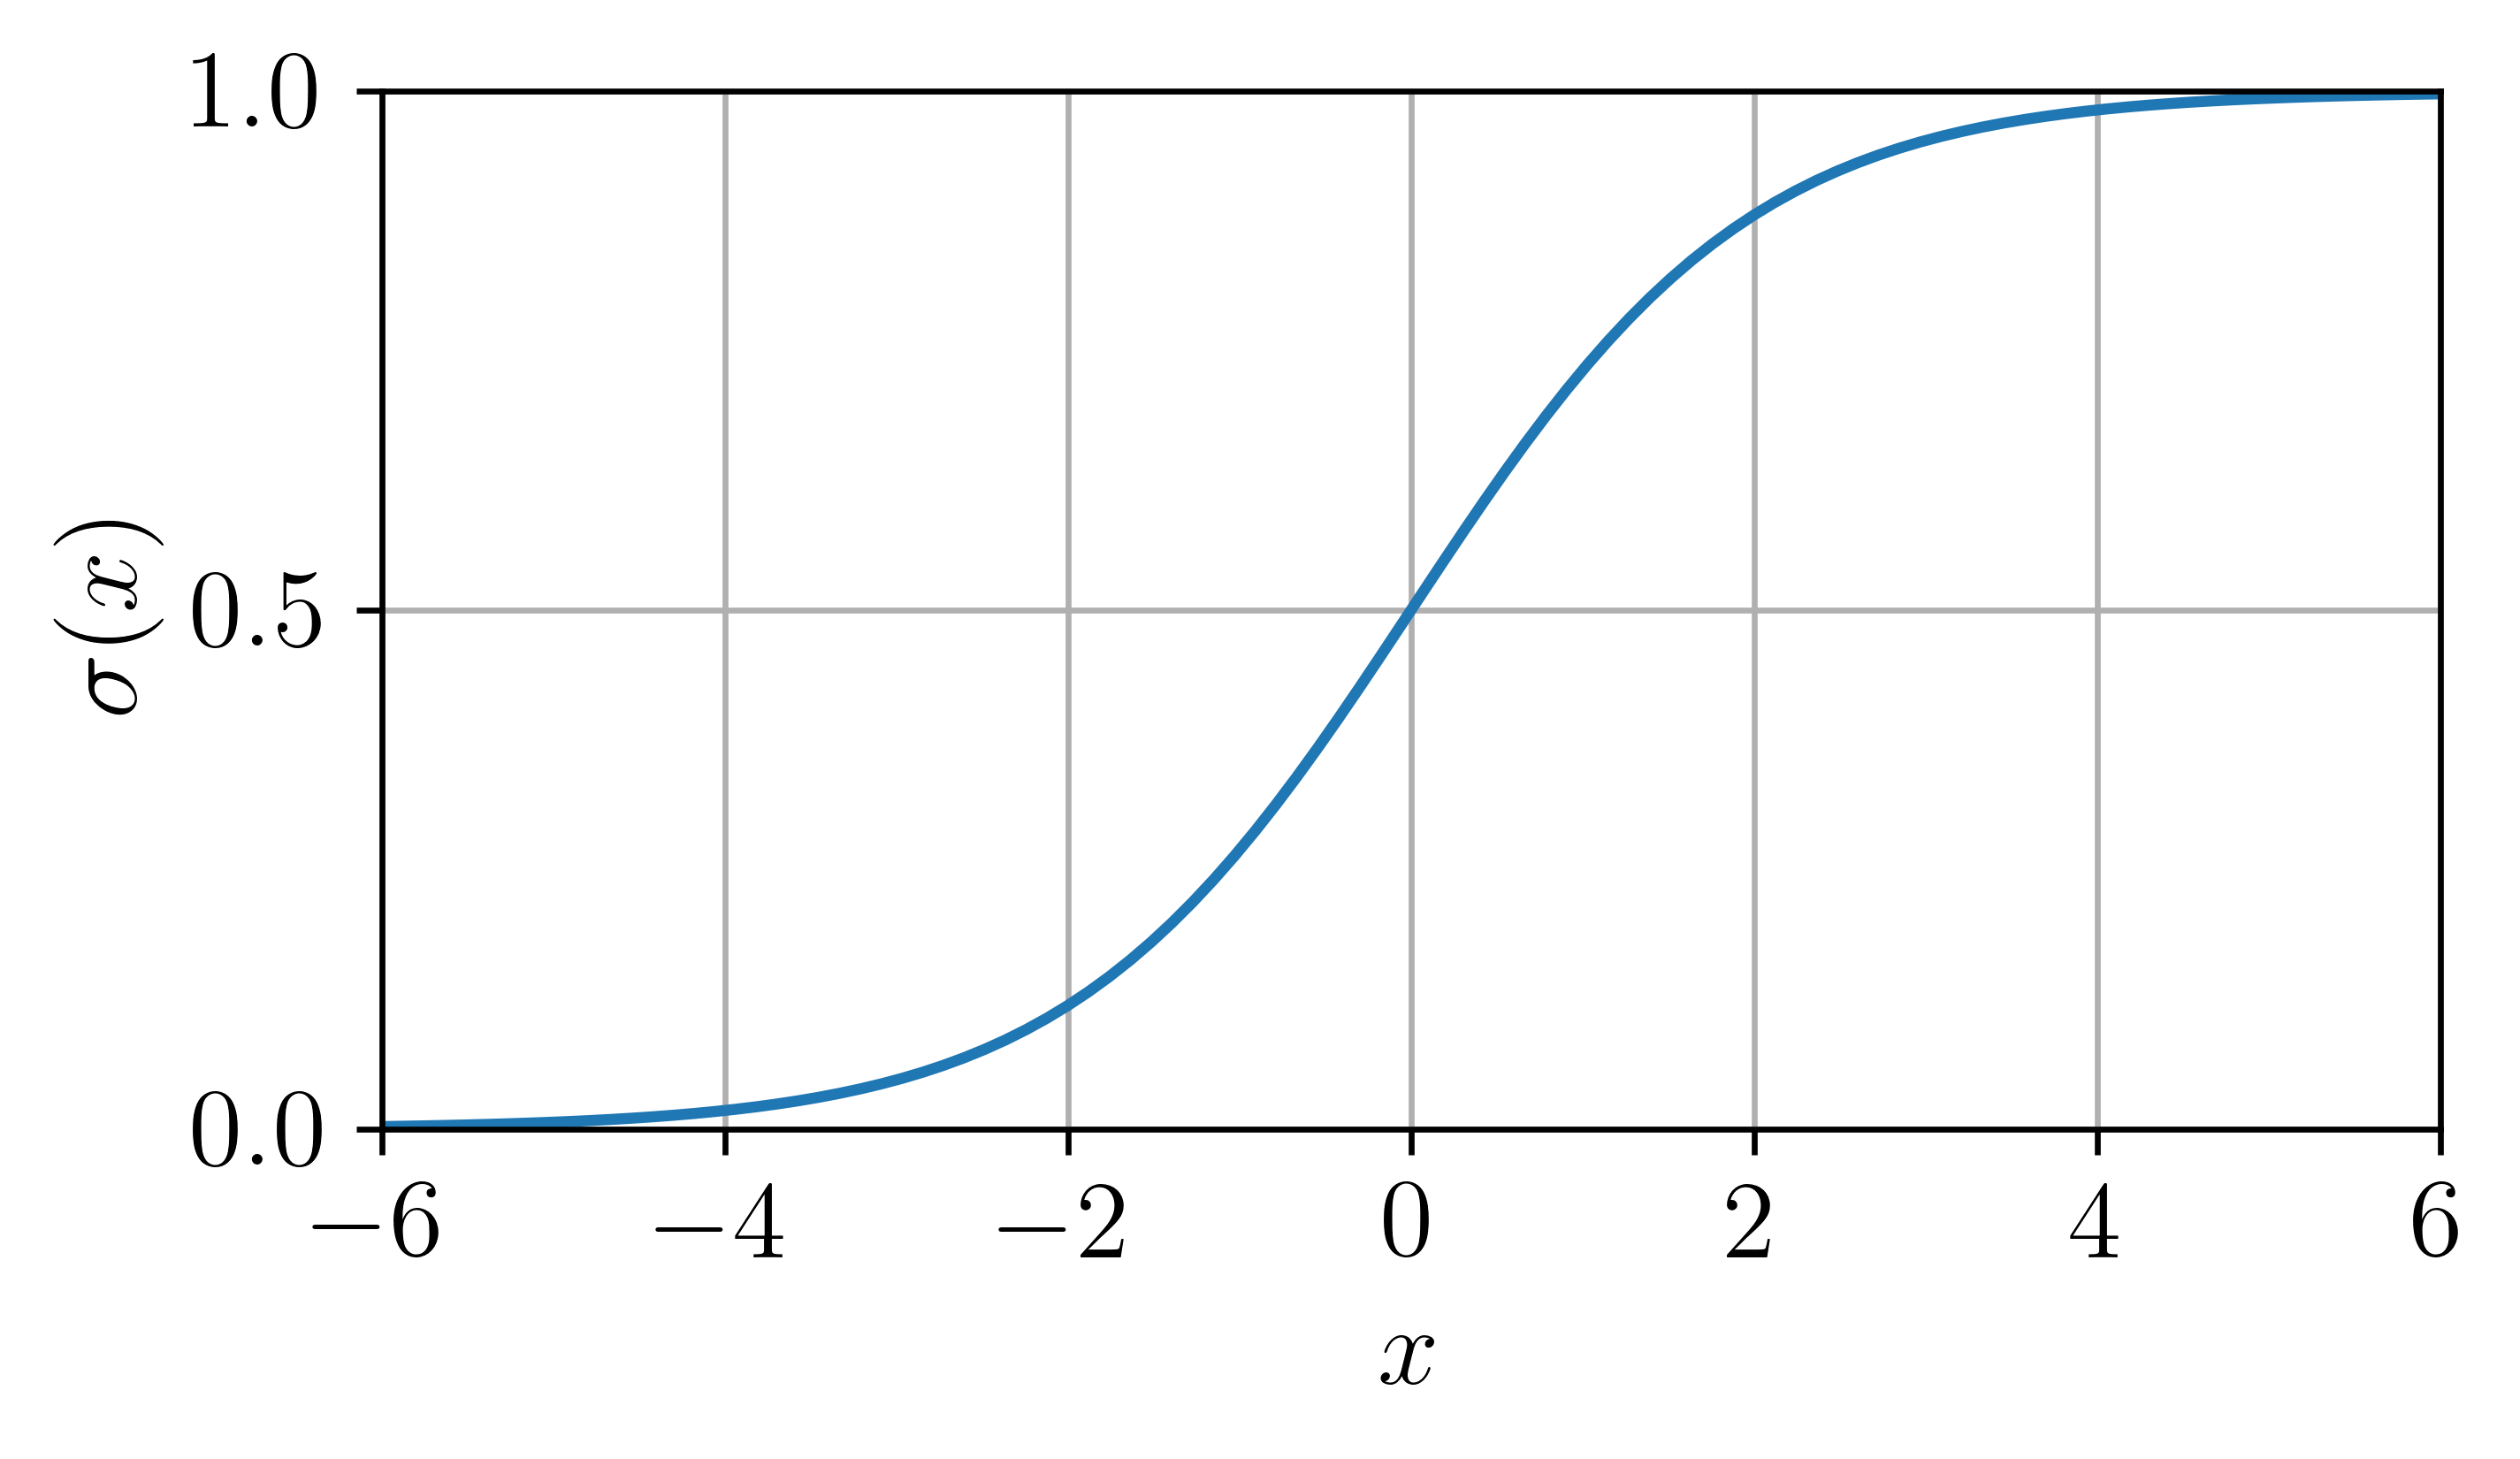

In [137]:
# sigmoid function


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


fig = plt.figure(figsize=(5, 3), tight_layout=True)
ax = fig.add_subplot(111)

x = np.linspace(-6, 6, 100)
y = sigmoid(x)


ax.grid()
ax.set_xticks([-6, -4, -2, 0, 2, 4, 6])
ax.set_yticks([0, 0.5, 1])
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\sigma(x)$")

ax.set_xlim(-6, 6)
ax.set_ylim(0, 1)


ax.plot(x, y)

plt.savefig("figs/sigmoid.png")

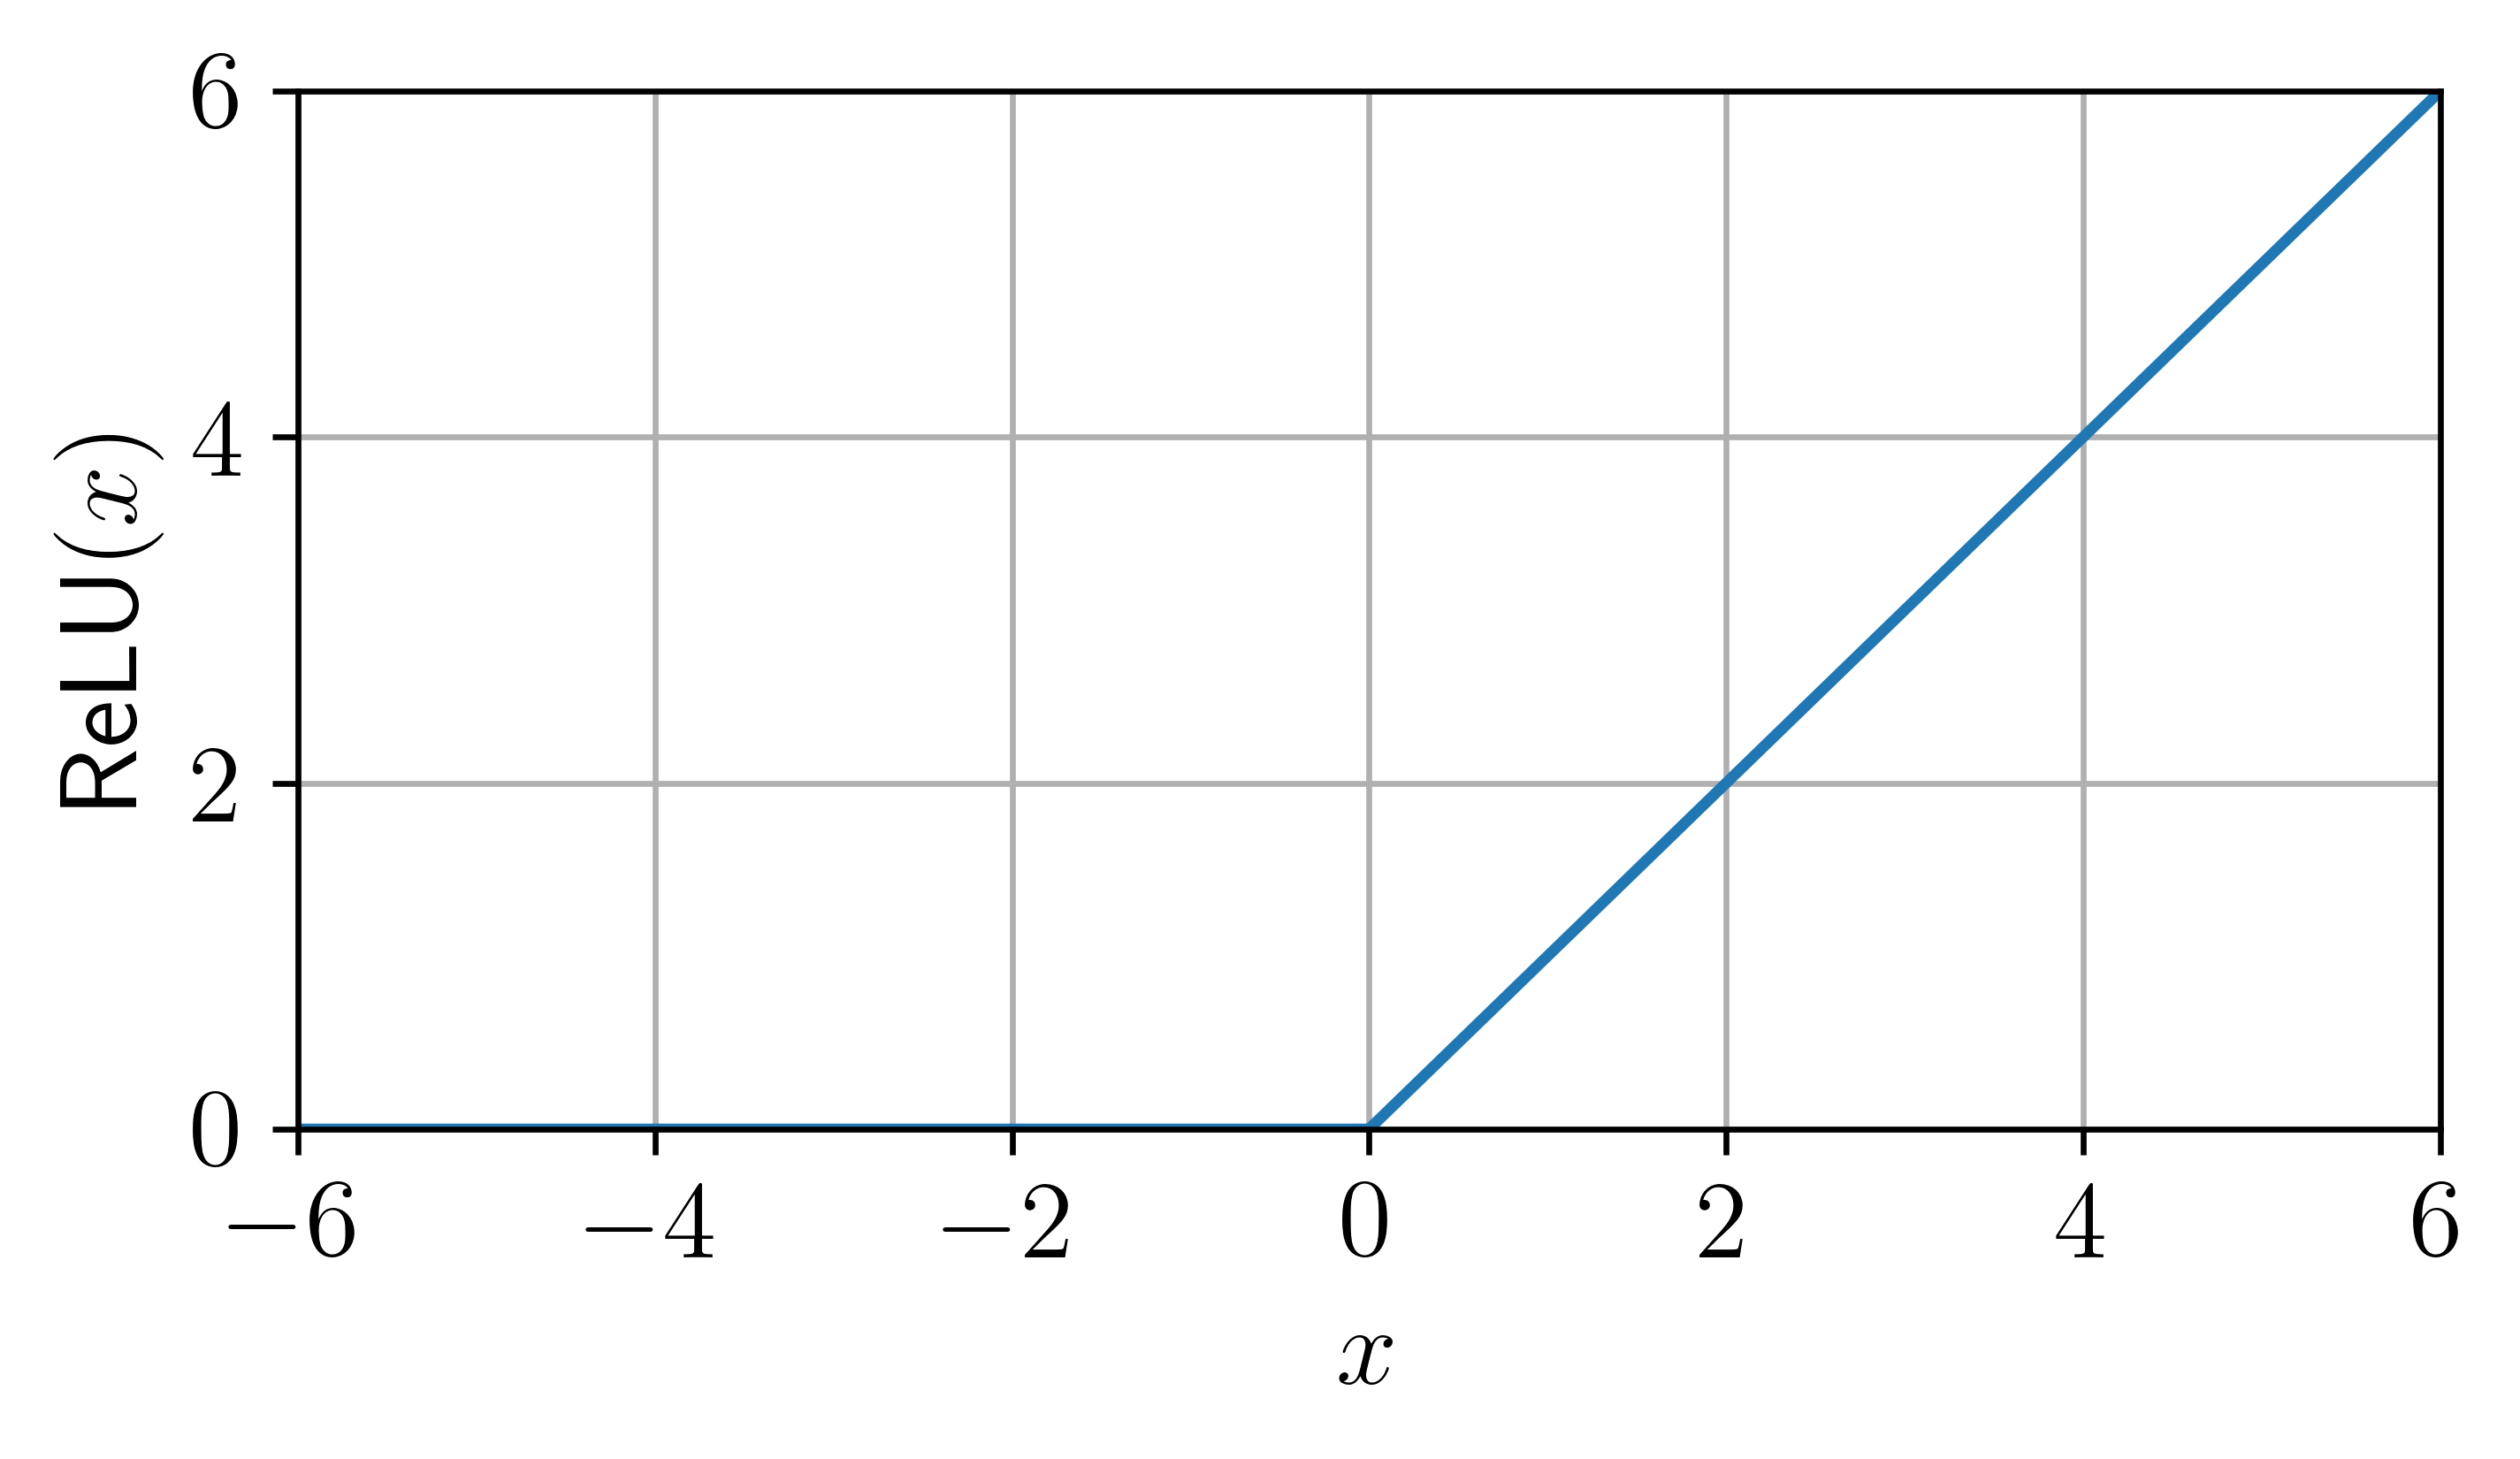

In [150]:
# ReLU function


def relu(x):
    return np.maximum(0, x)


fig = plt.figure(figsize=(5, 3), tight_layout=True)
ax = fig.add_subplot(111)

x = np.linspace(-6, 6, 1000)
y = relu(x)


ax.grid()
ax.set_xticks([-6, -4, -2, 0, 2, 4, 6])
ax.set_yticks([0, 2, 4, 6])
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\text{ReLU}(x)$")

ax.set_xlim(-6, 6)
ax.set_ylim(0, 6)


ax.plot(x, y)

plt.savefig("figs/relu.png")

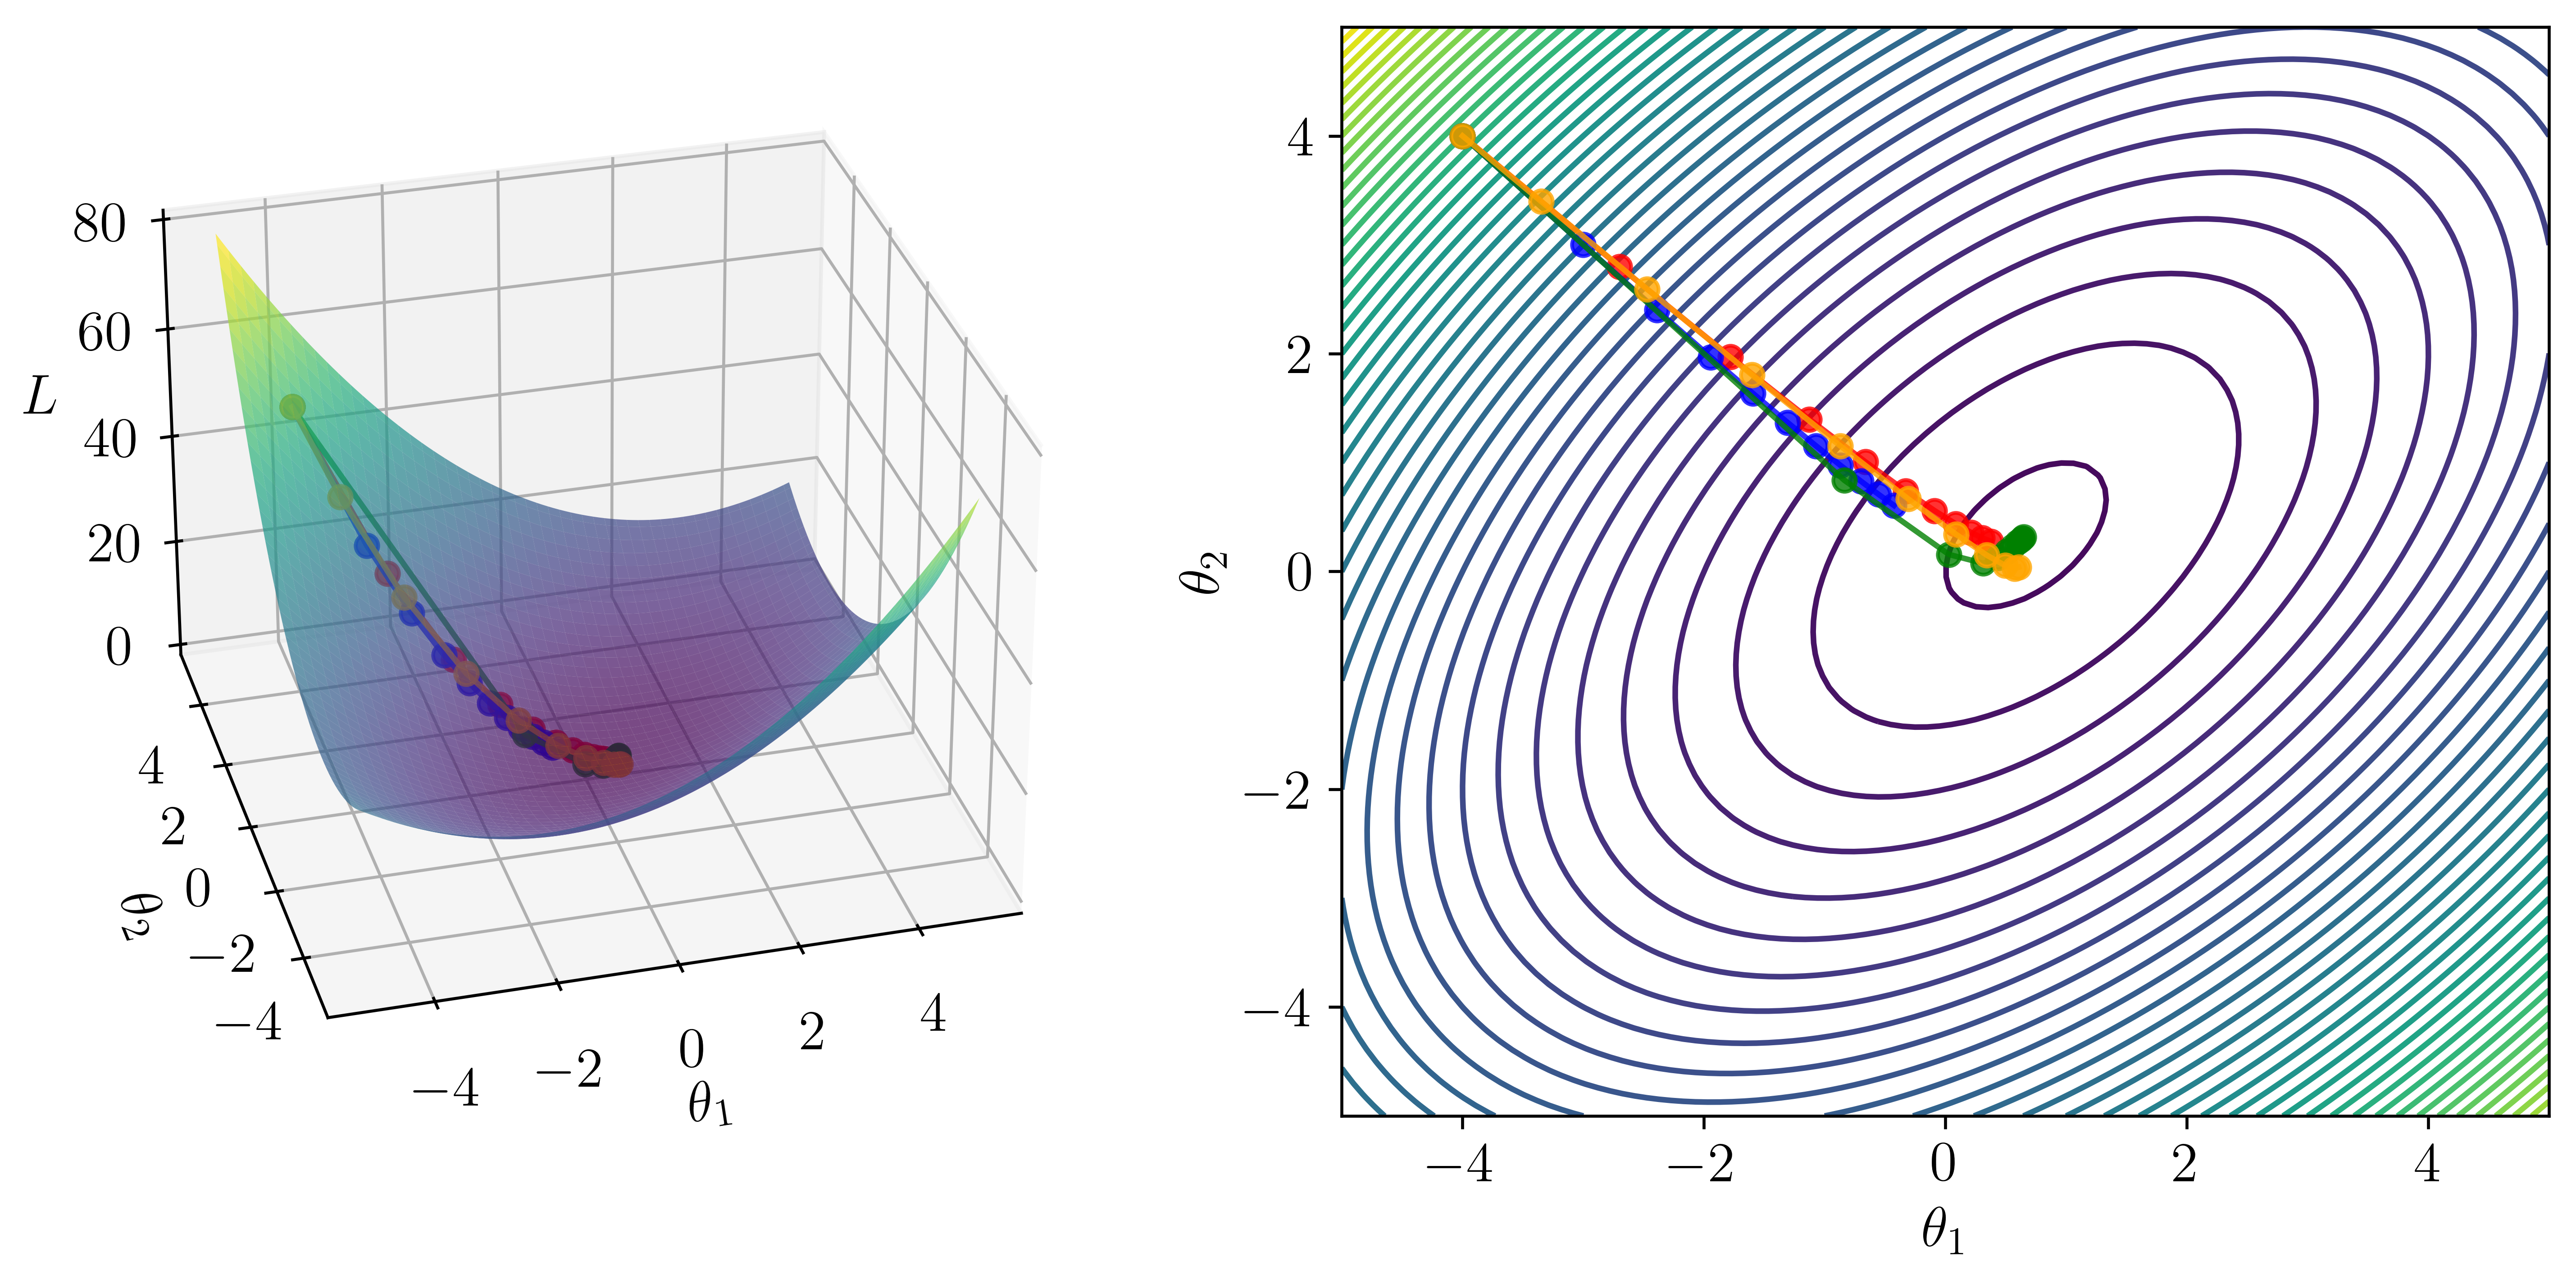

In [2]:
# comparison of different gradient descent methods


def L(x, y):
    return x**2 + y**2 - x * y - x


def grad_L(x, y):
    return np.array([2 * x - y - 1, 2 * y - x])


def plot_descent(ax_3d, ax_2d, points, *args, **kwargs):
    ax_3d.plot(
        points[:, 0],
        points[:, 1],
        L(points[:, 0], points[:, 1]),
        *args,
        **kwargs,
    )

    ax_2d.plot(
        points[:, 0],
        points[:, 1],
        *args,
        **kwargs,
    )


# 3D plot of the function
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = L(X, Y)
fig = plt.figure(figsize=(10, 5), tight_layout=True)

ax1 = fig.add_subplot(121, projection="3d")
ax2 = fig.add_subplot(122)

surf = ax1.plot_surface(
    X,
    Y,
    Z,
    cmap="viridis",
    edgecolor="none",
    alpha=0.7,
)
ax1.view_init(30, -105)

ax2.contour(X, Y, Z, levels=50, cmap="viridis")

# set labels
ax1.set_xlabel(r"$\theta_1$")
ax1.set_ylabel(r"$\theta_2$")
ax1.set_zlabel(r"$L$")
ax2.set_xlabel(r"$\theta_1$")
ax2.set_ylabel(r"$\theta_2$")

# naive gradient descent


def naive_gradient_descent(starting_point, learning_rate, num_iterations):
    points = [starting_point]
    for _ in range(num_iterations):
        grad = grad_L(*points[-1])
        new_point = points[-1] - learning_rate * grad
        points.append(new_point)
    return np.array(points)


points = naive_gradient_descent(
    starting_point=np.array([-4, 4]), learning_rate=0.1, num_iterations=10
)
plot_descent(
    ax1,
    ax2,
    points,
    color="red",
    marker="o",
    label="Naive Gradient Descent",
    alpha=0.8,
)

# adagrad


def adagrad(starting_point, learning_rate, num_iterations):
    points = [starting_point]
    grad_squared_sum = np.zeros_like(starting_point, dtype=float)
    for _ in range(num_iterations):
        grad = grad_L(*points[-1])
        grad_squared_sum += grad**2
        factor = learning_rate / (np.sqrt(grad_squared_sum) + 1e-8)
        new_point = points[-1] - factor * grad
        points.append(new_point)
    return np.array(points)


points = adagrad(starting_point=np.array([-4, 4]), learning_rate=1, num_iterations=10)
plot_descent(
    ax1,
    ax2,
    points,
    color="blue",
    marker="o",
    label="Adagrad",
    alpha=0.8,
)


# rmsprop
def rmsprop(starting_point, learning_rate, num_iterations, alpha=0.9):
    points = [starting_point]
    grad_squared_sum = np.zeros_like(starting_point, dtype=float)
    for _ in range(num_iterations):
        grad = grad_L(*points[-1])
        grad_squared_sum = alpha * grad_squared_sum + (1 - alpha) * grad**2
        factor = learning_rate / (np.sqrt(grad_squared_sum) + 1e-8)
        new_point = points[-1] - factor * grad
        points.append(new_point)
    return np.array(points)


points = rmsprop(starting_point=np.array([-4, 4]), learning_rate=1, num_iterations=10)
plot_descent(
    ax1,
    ax2,
    points,
    color="green",
    marker="o",
    label="RMSProp",
    alpha=0.8,
)

# momentu


def momentum(starting_point, learning_rate, num_iterations, alpha=0.5):
    points = [starting_point]
    velocity = np.zeros_like(starting_point, dtype=float)
    for _ in range(num_iterations):
        grad = grad_L(*points[-1])
        velocity = alpha * velocity - learning_rate * grad
        new_point = points[-1] + velocity
        points.append(new_point)
    return np.array(points)


points = momentum(
    starting_point=np.array([-4, 4]), learning_rate=0.05, num_iterations=10
)
plot_descent(
    ax1,
    ax2,
    points,
    color="orange",
    marker="o",
    label="Momentum",
    alpha=0.8,
)


plt.savefig("figs/gradient_descent_comparison.png")